# Demo

Here is a visual demo of the SLIC algorithm. 

In [59]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

import numpy as np
import random

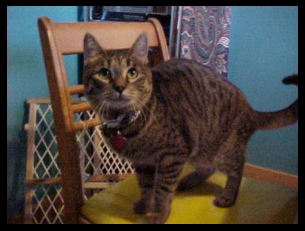

In [60]:
image = img_as_float(io.imread("animals/cats/cats_00001.jpg"))

plt.imshow(image)
plt.axis("off")
plt.show()

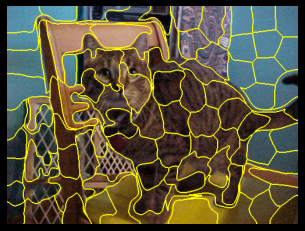

In [61]:
# apply SLIC to the image
n_segments = 100
segments = slic(image, n_segments = n_segments, sigma = 5, start_label = 1)
num_superpixels = len(np.unique(segments))

plt.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()

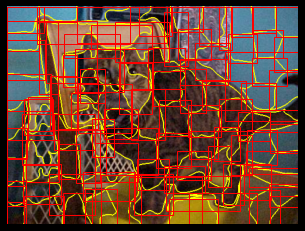

In [62]:
# apply rectangular to get the area
for region in regionprops(segments):
    y1, x1, y2, x2 = region.bbox
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor = "red", facecolor = "none")
    
    plt.gca().add_patch(rect)
    
plt.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()

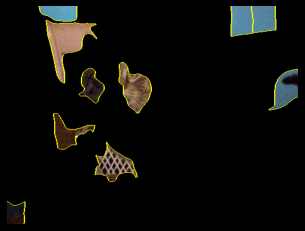

In [63]:
# create a mask
ratio = 0.9
masks = random.sample(range(1, num_superpixels), k = int(ratio * num_superpixels))

for i in masks:
    segments[segments == i] = 0
    
image[segments == 0] = 0

plt.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()

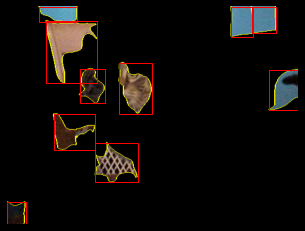

In [64]:
for region in regionprops(segments):
    y1, x1, y2, x2 = region.bbox
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor = "red", facecolor = "none")
    
    plt.gca().add_patch(rect)
    
plt.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()

***

### Here we create a demo of using our work.

In [65]:
from build_dataset import *
from torch.utils.data import Dataset, DataLoader

# load the dataset
dataset = CustomDataset("/home/lma/Summer-project-1/SLIC/animals")
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

images_list = []
for images, labels in data_loader:
    image = images[0]
    image = image.permute(1, 2, 0)
            
    images_list.append(image)
    num_images = len(images_list)

# shape of x_iamges: (num_images, height, width, channels)    
x_images = torch.stack(images_list)

n = x_images.shape[0]
h, w = x_images.shape[1], x_images.shape[2]
c = x_images.shape[3]

# reshape the x_images
x_images = x_images.view(n, c, h, w)
print(x_images.shape)

torch.Size([10, 3, 224, 224])


In [66]:
from patchify_slic import patchify_slic

patches = patchify_slic(x_images, n_patches=100, size=16)

In [67]:
patches.shape

torch.Size([10, 97, 768])

From the result, We can see that the patches are flattened.

Because of the special features of the algorithm, the number of patches is not always the same as the number of superpixels.